## Workflow:

1.Understand raw data → 2. Identify patterns/outliers → 3. Create physics-based derived features → 4. Preprocess for modeling

Uploading Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Loading Data

In [3]:
import pandas as pd
raw_data=pd.read_csv("machine failure data.csv")

## 1. Overall Sensor Distributions

The goal of this section is to understand the general operating behavior of machines under normal and stressed conditions.  
By examining sensor distributions, we establish baseline operating ranges and identify patterns that will later be compared against failure cases.

At this stage, no distinction is made between failure and non-failure events. This helps prevent biased interpretation and ensures a neutral baseline understanding.


### 1.1 Air and Process Temperature Distribution

Air temperature represents environmental conditions, while process temperature reflects internal machine heating.  
Understanding their distributions helps establish baseline thermal behavior.


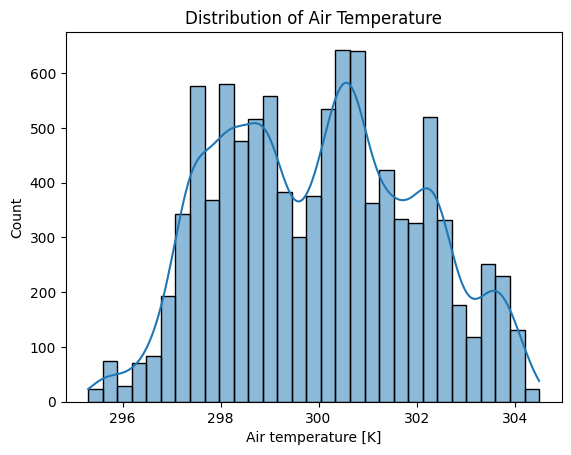

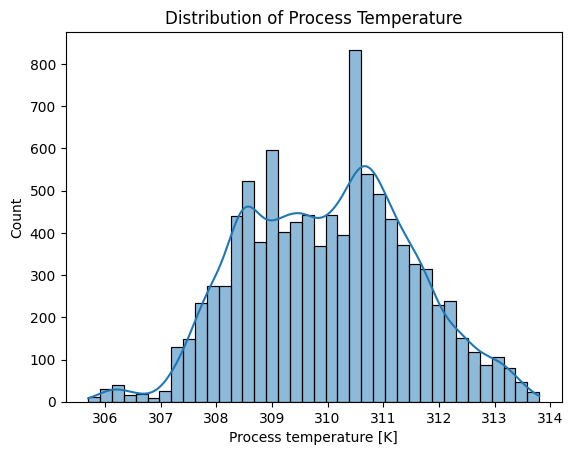

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.histplot(raw_data['Air temperature [K]'], kde=True)
plt.title('Distribution of Air Temperature')
plt.show()

plt.figure()
sns.histplot(raw_data['Process temperature [K]'], kde=True)
plt.title('Distribution of Process Temperature')
plt.show()

### Interpretation

The air and process temperature distributions show how frequently different temperature values occur during machine operation.  
Both variables follow a near bell-shaped pattern, indicating stable and controlled operating conditions.

Process temperature values are consistently higher than air temperature, which is expected due to heat generation during machine operation.  
Extreme temperature values appear infrequently and may represent conditions associated with thermal stress, which will be examined further in later analysis.


### 1.2 Rotational Speed and Torque Distribution

Rotational speed and torque represent mechanical operating conditions.  
Their distributions provide insight into normal operating loads and stress levels.


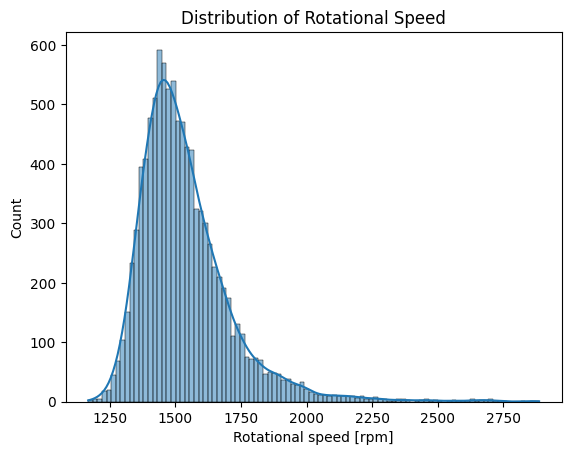

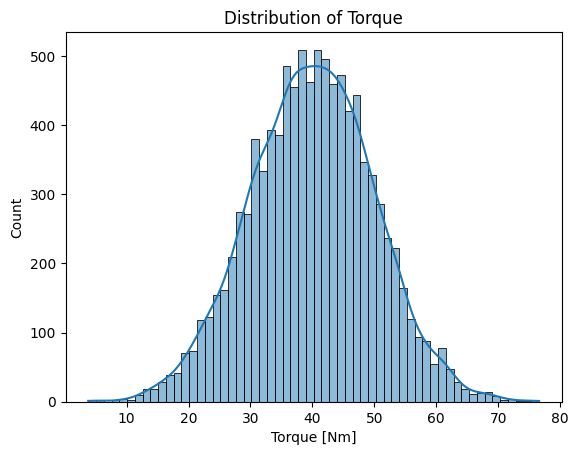

In [16]:
plt.figure()
sns.histplot(raw_data['Rotational speed [rpm]'], kde=True)
plt.title('Distribution of Rotational Speed')
plt.show()

plt.figure()
sns.histplot(raw_data['Torque [Nm]'], kde=True)
plt.title('Distribution of Torque')
plt.show()

### Interpretation

The rotational speed distribution shows that most machines operate around 1500 rpm, with fewer observations at higher speeds.  
The torque distribution follows a near-normal pattern centered around 40 Nm, indicating consistent mechanical loading.

The wider spread in rotational speed suggests variation in operational requirements, while the stable torque values reflect controlled load conditions.  
Rare extreme values may represent operating states associated with increased mechanical stress.


### 1.3 Tool Wear Distribution

Tool wear represents cumulative usage and degradation over time.  
Understanding its distribution helps identify early, mid, and late lifecycle operation.


In [ ]:
plt.figure()
sns.histplot(raw_data['Tool wear [min]'], kde=True)
plt.title('Distribution of Tool Wear')
plt.show()

### Interpretation

The tool wear distribution appears approximately uniform, indicating that the dataset contains observations from all stages of the tool lifecycle.  
This includes newly installed tools, moderately worn tools, and tools nearing the end of their usable life.

The absence of strong skewness suggests that the data collection process does not favor any specific wear stage.  
This provides a complete view of tool usage behavior and establishes a baseline for analyzing wear-related failures.


## 2. Failure vs Non-Failure Comparison

In this section, we compare sensor measurements between machine operations that resulted in failures and those that did not.  
This analysis helps identify which sensors and operating conditions are associated with higher risk of failure.


## Step 2.1 — Air & Process Temperature vs Failure
Temperature is often linked to heat dissipation failures.
By comparing air and process temperatures for failures vs non-failures, we can see if elevated process temperatures or smaller temperature gradients are warning signs.

In [ ]:
plt.figure(figsize=(12,5))
sns.kdeplot(raw_data[raw_data['Machine failure']==0]['Air temperature [K]'], label='No Failure', shade=True)
sns.kdeplot(raw_data[raw_data['Machine failure']==1]['Air temperature [K]'], label='Failure', shade=True)
plt.title('Air Temperature Distribution: Failure vs No Failure')
plt.xlabel('Air Temperature [K]')
plt.ylabel('Density')
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
sns.kdeplot(raw_data[raw_data['Machine failure']==0]['Process temperature [K]'], label='No Failure', shade=True)
sns.kdeplot(raw_data[raw_data['Machine failure']==1]['Process temperature [K]'], label='Failure', shade=True)
plt.title('Process Temperature Distribution: Failure vs No Failure')
plt.xlabel('Process Temperature [K]')
plt.ylabel('Density')
plt.legend()
plt.show()

### Interpretation

The KDE plots compare air and process temperature distributions for normal operations and machine failures.  
Failures tend to occur at higher temperature values, particularly for process temperature.

Although there is overlap between normal and failure conditions, the failure distributions are shifted toward higher temperatures.  
This indicates that elevated thermal conditions are associated with increased failure risk.


## Step 2.2 — Rotational Speed & Torque vs Failure
🧠 Why We Do This

High rotational speed or torque may indicate mechanical stress, which can cause wear or overstrain failures.

Comparing failure vs non-failure helps identify load thresholds that increase failure risk.

In [ ]:
plt.figure(figsize=(12,5))
sns.kdeplot(raw_data[raw_data['Machine failure']==0]['Rotational speed [rpm]'], label='No Failure', shade=True)
sns.kdeplot(raw_data[raw_data['Machine failure']==1]['Rotational speed [rpm]'], label='Failure', shade=True)
plt.title('Rotational Speed Distribution: Failure vs No Failure')
plt.xlabel('Rotational Speed [rpm]')
plt.ylabel('Density')
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
sns.kdeplot(raw_data[raw_data['Machine failure']==0]['Torque [Nm]'], label='No Failure', shade=True)
sns.kdeplot(raw_data[raw_data['Machine failure']==1]['Torque [Nm]'], label='Failure', shade=True)
plt.title('Torque Distribution: Failure vs No Failure')
plt.xlabel('Torque [Nm]')
plt.ylabel('Density')
plt.legend()
plt.show()

### Interpretation

The KDE plots compare rotational speed and torque distributions for normal operation and machine failures.  
Failures are more frequently observed at extreme mechanical conditions, particularly at very low rotational speeds and high torque values.

In contrast, normal operations are concentrated within a narrow mid-range for both variables.  
This pattern suggests that mechanical instability is more likely when machines operate outside their typical load conditions.


## Step 2.3 — Tool Wear vs Failure
🧠 Why We Do This

Tool wear represents cumulative degradation.

Comparing wear levels between failures and normal operation shows whether failure is more likely at higher wear stages.

In [ ]:
plt.figure(figsize=(12,5))
sns.kdeplot(raw_data[raw_data['Machine failure']==0]['Tool wear [min]'], label='No Failure', shade=True)
sns.kdeplot(raw_data[raw_data['Machine failure']==1]['Tool wear [min]'], label='Failure', shade=True)
plt.title('Tool Wear Distribution: Failure vs No Failure')
plt.xlabel('Tool Wear [min]')
plt.ylabel('Density')
plt.legend()
plt.show()

### Interpretation

The KDE plot compares tool wear distributions for normal operation and machine failures.  
Normal operations are spread relatively evenly across all wear levels, while failures are more concentrated at higher tool wear values.

As tool wear increases, the density of failure observations rises, particularly toward the upper end of the wear range.  
This pattern suggests that cumulative degradation plays an important role in machine failure and should be examined further in later stages.


## Step 3 — Physics-Driven Relationships

### 3.1 Temperature Difference (Process – Air)

The difference between process temperature and air temperature represents the thermal stress on the machine.  
Analyzing this gradient helps identify whether heat-related issues contribute to failures.


In [ ]:
# Create a new column for temperature difference
raw_data['Temp_diff'] = raw_data['Process temperature [K]'] - raw_data['Air temperature [K]']

plt.figure(figsize=(12,5))
sns.kdeplot(raw_data[raw_data['Machine failure']==0]['Temp_diff'], label='No Failure', shade=True)
sns.kdeplot(raw_data[raw_data['Machine failure']==1]['Temp_diff'], label='Failure', shade=True)
plt.title('Temperature Difference Distribution: Failure vs No Failure')
plt.xlabel('Process Temp – Air Temp [K]')
plt.ylabel('Density')
plt.legend()
plt.show()

### Interpretation

The KDE plot compares the temperature difference (process temperature minus air temperature) for normal operation and machine failures.  
Normal operations show a tight distribution around a consistent temperature gap, while failures are more concentrated at lower temperature differences.

This shift suggests that reduced temperature separation between the machine and its environment is associated with higher failure occurrence.  
The temperature difference therefore provides useful insight into thermal behavior beyond absolute temperature values.


### 3.2 Torque vs Rotational Speed

This scatter plot shows the relationship between torque and rotational speed, highlighting combinations that may increase mechanical stress and failure likelihood.


In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Rotational speed [rpm]', y='Torque [Nm]', hue='Machine failure', data=raw_data, alpha=0.6)
plt.title('Torque vs Rotational Speed: Failure vs No Failure')
plt.xlabel('Rotational Speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.legend(title='Machine Failure')
plt.show()

### Interpretation

The scatter plot illustrates the relationship between torque and rotational speed during normal operation and machine failures.  
Normal operations form a dense cluster within a central operating region, while failures are more frequently observed at the outer extremes of the torque–speed space.

This pattern indicates that machine failures are associated with operating conditions outside the typical torque and speed range.  



### 3.3 Tool Wear vs Temperature Difference

This scatter plot shows how tool wear interacts with thermal stress to influence machine failure risk.


In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Tool wear [min]', y='Temp_diff', hue='Machine failure', data=raw_data, alpha=0.6)
plt.title('Tool Wear vs Temperature Difference: Failure vs No Failure')
plt.xlabel('Tool Wear [min]')
plt.ylabel('Temperature Difference [K]')
plt.legend(title='Machine Failure')
plt.show()

### Interpretation

The scatter plot compares tool wear and temperature difference for normal operation and machine failures.  
Normal operations occupy a broad central region, while failures are concentrated in specific areas of the feature space.

Failures appear both at high tool wear values and at low temperature differences, indicating that multiple degradation pathways may lead to machine breakdown.  
This interaction suggests that tool wear and thermal conditions contribute to failure risk in different ways rather than through a single combined effect.


## EDA Summary & Next Steps

This exploratory analysis examined the thermal, mechanical, and degradation-related sensor data to understand operating behavior and failure patterns in industrial machinery.

Temperature analysis showed that failures tend to occur under elevated thermal conditions and reduced temperature differences between process and ambient air, suggesting that cooling efficiency plays an important role in machine reliability. Mechanical variables such as rotational speed and torque revealed that failures are more likely when machines operate outside their typical load ranges, particularly at extreme combinations rather than at nominal operating points. Tool wear analysis indicated that failures become more frequent at higher wear levels, highlighting the impact of cumulative degradation over time.

Multivariate exploration demonstrated that failures are not driven by a single factor but emerge under specific combinations of thermal stress, mechanical load, and wear. These interactions indicate that raw sensor values alone may not fully capture the physical conditions leading to failure.

### Implications for Preprocessing and Feature Engineering

Based on these observations, the following steps will be taken in the preprocessing stage:
- Derivation of physics-informed features (e.g., temperature difference, power-related metrics).
- Scaling and normalization of continuous variables to ensure comparability across sensors.
- Careful handling of class imbalance due to the low overall failure rate.
- Preparation of features suitable for both binary and multi-class failure prediction.

The next notebook will focus on preprocessing, feature engineering, and preparing the dataset for machine learning models informed by the physical insights gained during this exploratory analysis.
